In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier

In [3]:
wine = pd.read_csv('/content/drive/MyDrive/ML_TermProject/winequality-redWhite.csv')
wine.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_encoded
0,7.2,0.24,0.30,1.6,0.048,27.0,131.0,0.99330,3.25,0.45,10.5,5,1
1,5.7,1.13,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4,0
2,7.2,0.63,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,6,0
3,6.4,0.31,0.38,2.9,0.038,19.0,102.0,0.99120,3.17,0.35,11.0,7,1
4,8.6,0.80,0.11,2.3,0.084,12.0,31.0,0.99790,3.40,0.48,9.9,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.9,0.30,0.21,15.7,0.056,49.0,159.0,0.99827,3.11,0.48,9.0,5,1
96,8.1,0.78,0.10,3.3,0.090,4.0,13.0,0.99855,3.36,0.49,9.5,5,0
97,6.9,1.09,0.06,2.1,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,4,0
98,8.0,0.14,0.33,1.2,0.045,71.0,162.0,0.99140,3.07,0.47,11.0,6,1


In [4]:
# Define the mapping dictionary
mapping_info = {1: "white", 0: "red"}

In [5]:
# Print the mapping information
for key, value in mapping_info.items():
    print(f"{key} represents {value} wine.")

1 represents white wine.
0 represents red wine.


In [6]:
print(wine['type_encoded'].dtype)

int64


In [7]:
# Check the data types of all columns
print(wine.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type_encoded              int64
dtype: object


In [8]:
print(wine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.2              0.24         0.30             1.6      0.048   
1               5.7              1.13         0.09             1.5      0.172   
2               7.2              0.63         0.00             1.9      0.097   
3               6.4              0.31         0.38             2.9      0.038   
4               8.6              0.80         0.11             2.3      0.084   
...             ...               ...          ...             ...        ...   
5022            5.7              0.25         0.27            10.8      0.050   
5023            7.4              0.25         0.29             6.8      0.020   
5024            7.8              0.28         0.25             3.4      0.024   
5025            8.3              0.16         0.48             1.7      0.057   
5026            6.1              0.34         0.21             5.0      0.042   

      free sulfur dioxide  

In [9]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_encoded
0,7.2,0.24,0.30,1.6,0.048,27.0,131.0,0.99330,3.25,0.45,10.5,5,1
1,5.7,1.13,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4,0
2,7.2,0.63,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,6,0
3,6.4,0.31,0.38,2.9,0.038,19.0,102.0,0.99120,3.17,0.35,11.0,7,1
4,8.6,0.80,0.11,2.3,0.084,12.0,31.0,0.99790,3.40,0.48,9.9,5,0


In [10]:
# checking for missing values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_encoded            0
dtype: int64

In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5027 entries, 0 to 5026
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5027 non-null   float64
 1   volatile acidity      5027 non-null   float64
 2   citric acid           5027 non-null   float64
 3   residual sugar        5027 non-null   float64
 4   chlorides             5027 non-null   float64
 5   free sulfur dioxide   5027 non-null   float64
 6   total sulfur dioxide  5027 non-null   float64
 7   density               5027 non-null   float64
 8   pH                    5027 non-null   float64
 9   sulphates             5027 non-null   float64
 10  alcohol               5027 non-null   float64
 11  quality               5027 non-null   int64  
 12  type_encoded          5027 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 510.7 KB


<Axes: xlabel='quality', ylabel='fixed acidity'>

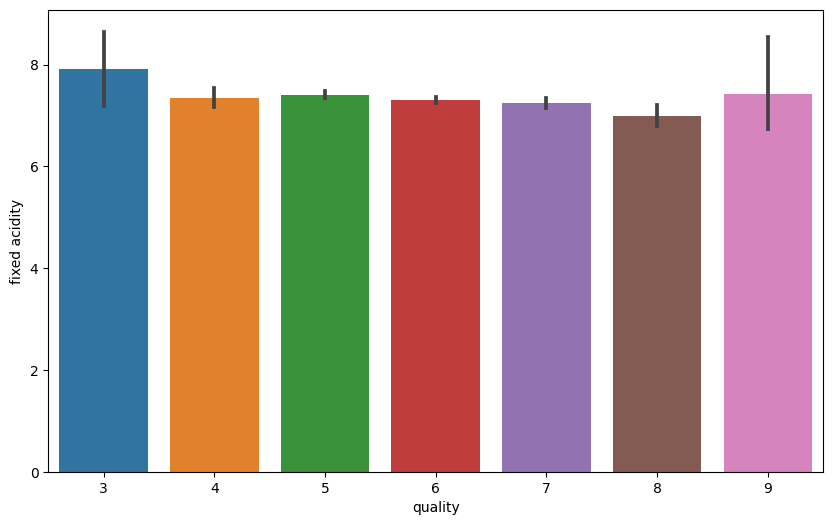

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

<Axes: xlabel='quality', ylabel='volatile acidity'>

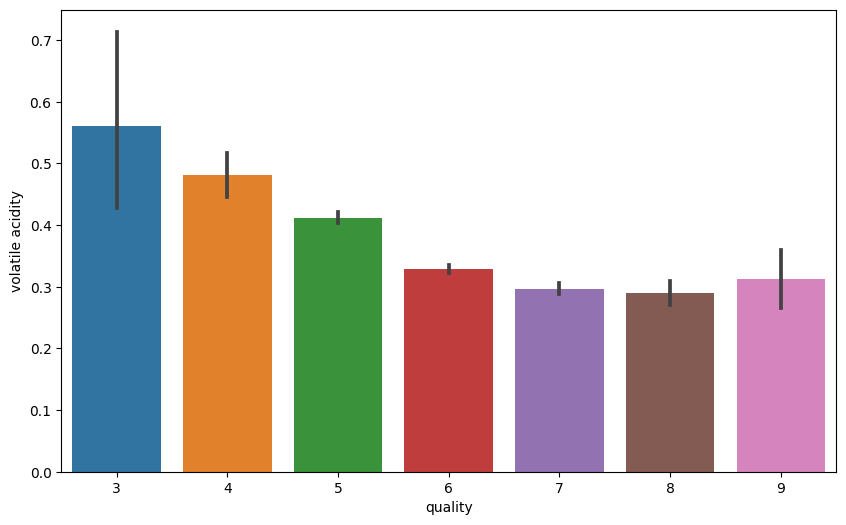

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

<Axes: xlabel='quality', ylabel='citric acid'>

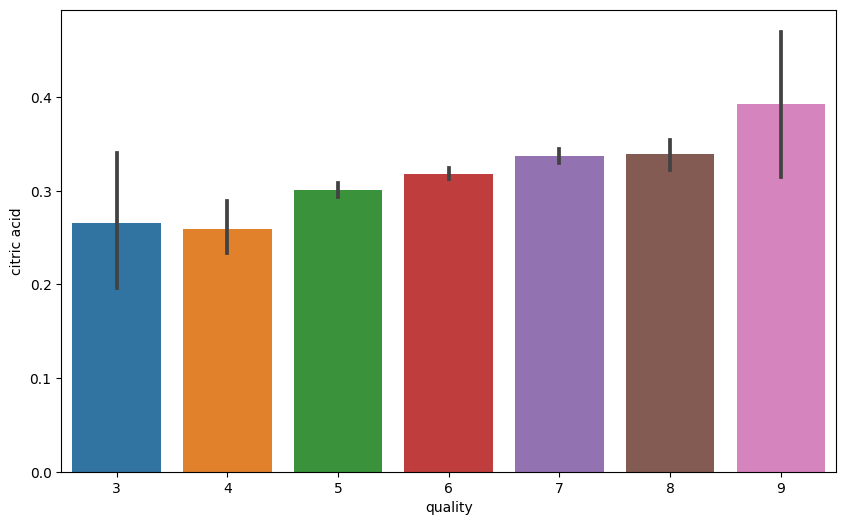

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

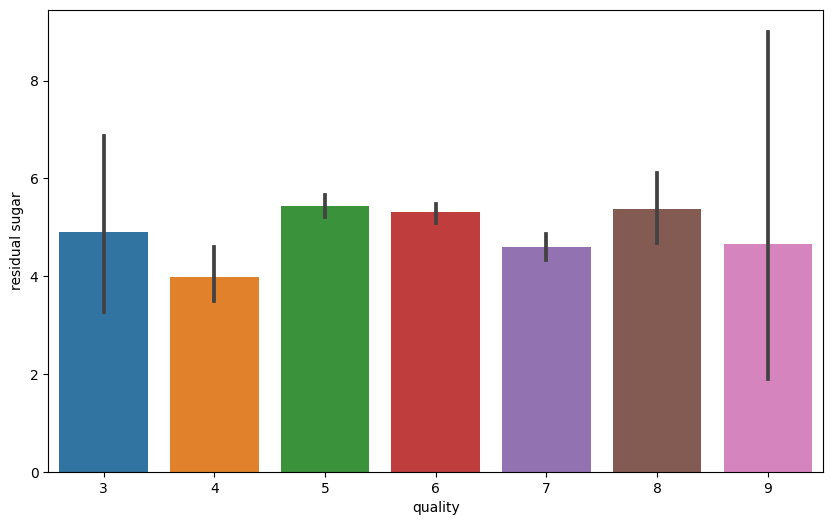

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

<Axes: xlabel='quality', ylabel='chlorides'>

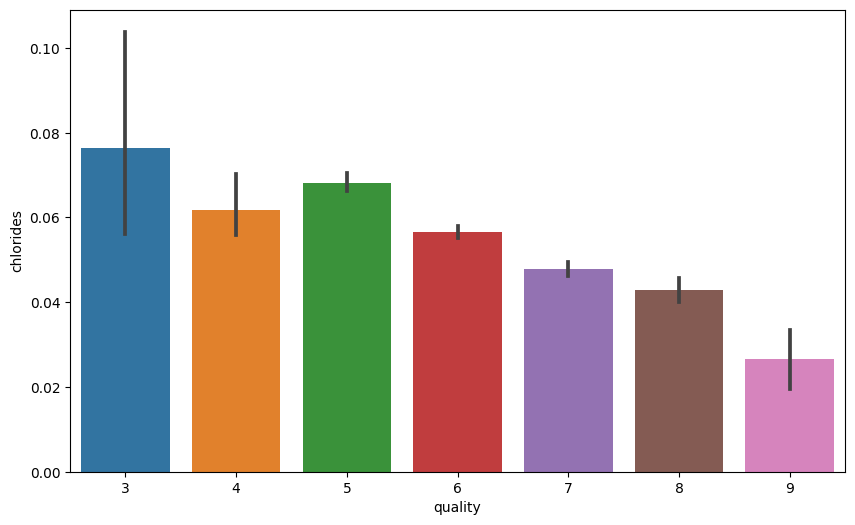

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

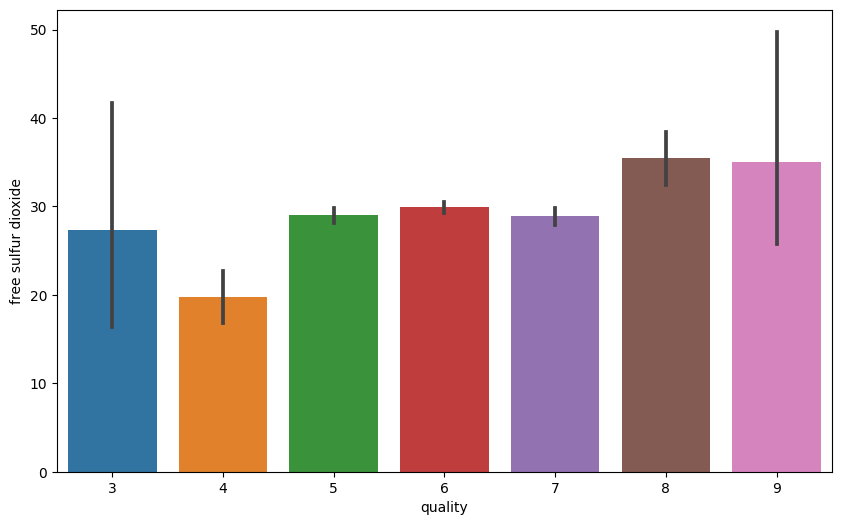

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

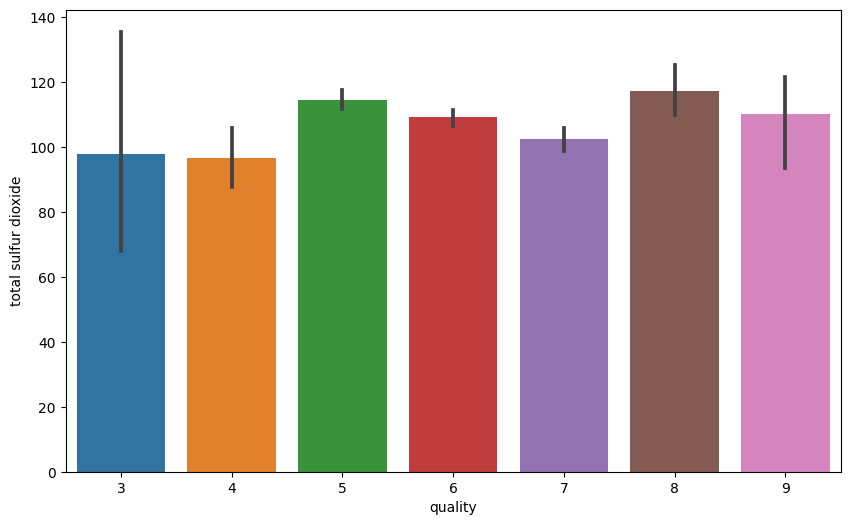

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<Axes: xlabel='quality', ylabel='sulphates'>

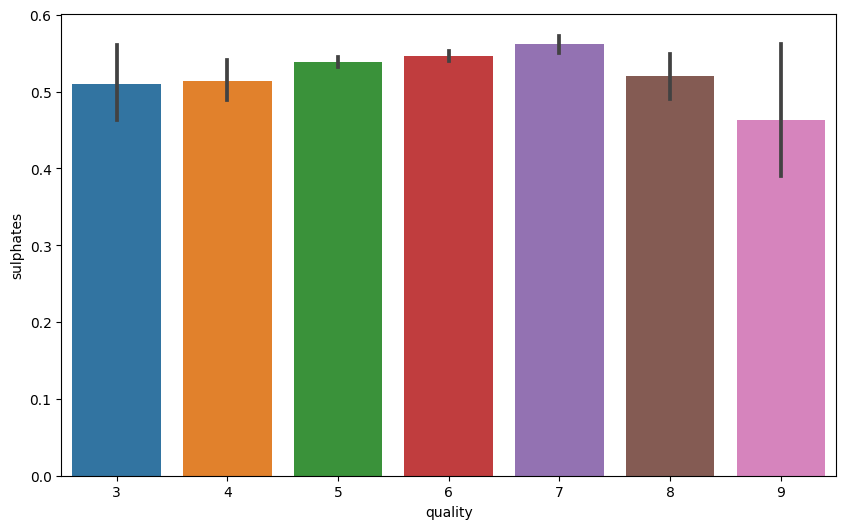

In [19]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

<Axes: xlabel='quality', ylabel='alcohol'>

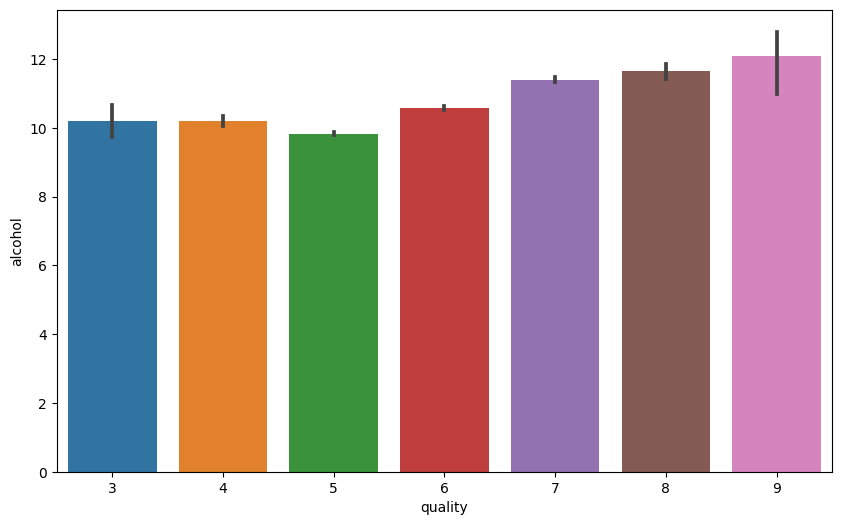

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [21]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [22]:
label_quality = LabelEncoder()

In [23]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [24]:
wine['quality'].value_counts()

0    4068
1     955
2       4
Name: quality, dtype: int64

<Axes: ylabel='count'>

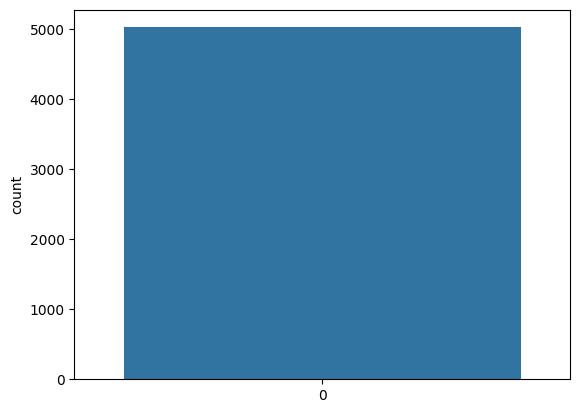

In [25]:
sns.countplot(wine['quality'])

In [26]:
X = wine.drop(['quality'], axis=1)  # Features: all columns except 'quality'
y = wine['quality']  # Target variable: 'quality'

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
rf_classifier = RandomForestClassifier()

In [29]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
predictions = rf_classifier.predict(X_test)

In [31]:
accuracy = rf_classifier.score(X_test, y_test)

In [32]:
print("Accuracy:", accuracy)

Accuracy: 0.885685884691849


In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       823
           1       0.80      0.50      0.61       183

    accuracy                           0.89      1006
   macro avg       0.85      0.73      0.77      1006
weighted avg       0.88      0.89      0.87      1006



In [34]:
print(confusion_matrix(y_test, predictions))

[[800  23]
 [ 92  91]]


In [35]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [36]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       823
           1       0.41      0.62      0.49       183

    accuracy                           0.77      1006
   macro avg       0.66      0.71      0.67      1006
weighted avg       0.81      0.77      0.78      1006



In [37]:
print(confusion_matrix(y_test, pred_sgd))

[[657 166]
 [ 69 114]]


In [38]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [39]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       823
           1       0.00      0.00      0.00       183

    accuracy                           0.82      1006
   macro avg       0.41      0.50      0.45      1006
weighted avg       0.67      0.82      0.74      1006



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       823
           1       0.98      0.25      0.39       183

    accuracy                           0.86      1006
   macro avg       0.92      0.62      0.66      1006
weighted avg       0.88      0.86      0.83      1006



In [41]:
svc_model = SVC()

In [42]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

In [43]:
grid_svc = GridSearchCV(svc_model, param_grid, scoring='accuracy', cv=5)

In [ ]:
grid_svc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
